## This is a Heading (level 2)

This is an equation: $$ \frac{d}{dt} \vec{x} = \mathbf{A} \vec{x} + \mathbf{B} u $$ 

This was done using LaTeX format. This is **Markdown.**

So let's do an example of this with some python on it. This is going to be a simple system like a **mass with friction** or low-pass filter


In [1]:
def my_ode_fn(time, states):
    """
    This is my set of ODE's
    
    @param time The simulated time
    @param states A list of system states, in this case [velocity, position]
    @returns A list of derivatives of system states, here [acceleration, velocity]
    """
    coeff_A = -0.9
    coeff_B = 0.1
    
    # Simulated voltage that goes from 0 to 1 volts at time 1 sec
    input_voltage = 10.0 if time > 1.0 else 0.0
    
    # The differential equations
    velocity = states[0]
    position = states[1]
        
    ddt_velocity = coeff_A * velocity + coeff_B * input_voltage
    ddt_position = velocity
    
    # Return the list of derivatives
    return [ddt_velocity, ddt_position]

## Now solve this!
Here is the code to solve the differential equations

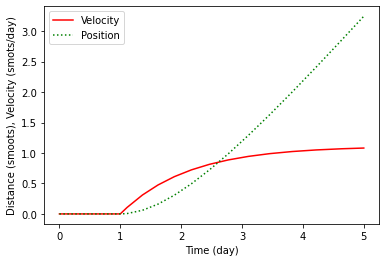

In [4]:
%matplotlib inline

from matplotlib import pyplot
from scipy.integrate import solve_ivp

# Run the integration! Gimme those results!
results = solve_ivp(my_ode_fn, [0.0, 5.0], [0.0, 0.0], rtol=1e-7) 
        #The last parameter is a relative tolerance to preserve quality over quantity

# Plot the results
pyplot.plot (results.t, results.y[0], 'r-', results.t, results.y[1], 'g:')
pyplot.xlabel('Time (day)')
pyplot.ylabel('Distance (smoots), Velocity (smots/day)')
pyplot.legend(["Velocity","Position"])
pyplot.show()

## What about impulse response?
Bonk

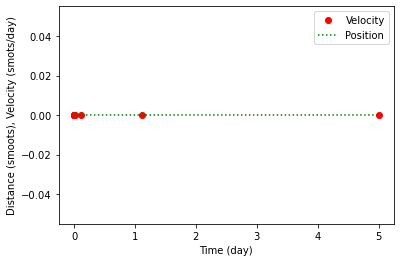

[0.000000e+00 1.000000e-06 1.100000e-05 1.110000e-04 1.111000e-03
 1.111100e-02 1.111110e-01 1.111111e+00 5.000000e+00]


In [7]:
def my_ode_fn(time, states):
    """
    This is my set of ODE's
    
    @param time The simulated time
    @param states A list of system states, in this case [velocity, position]
    @returns A list of derivatives of system states, here [acceleration, velocity]
    """
    coeff_A = -0.9
    coeff_B = 0.1
    
    # Simulated voltage that goes from 0 to 1 volts at time 1 sec
    input_voltage = 100.0 if (time > 1.0 and time < 1.1) else 0.0
    
    # The differential equations
    velocity = states[0]
    position = states[1]
        
    ddt_velocity = coeff_A * velocity + coeff_B * input_voltage
    ddt_position = velocity
    
    # Return the list of derivatives
    return [ddt_velocity, ddt_position]

results = solve_ivp(my_ode_fn, [0.0, 5.0], [0.0, 0.0], rtol=1e-7) 
        #The last parameter is a relative tolerance to preserve quality over quantity

# Plot the results
pyplot.plot (results.t, results.y[0], 'ro', results.t, results.y[1], 'g:')
pyplot.xlabel('Time (day)')
pyplot.ylabel('Distance (smoots), Velocity (smots/day)')
pyplot.legend(["Velocity","Position"])
pyplot.show()
print(results.t)

**What is happening here is that the solution technique saw that nothing was happening so it took greater time steps, we need to define a max time step using max_step**

In [10]:
def my_ode_fn(time, states):
    """
    This is my set of ODE's
    
    @param time The simulated time
    @param states A list of system states, in this case [velocity, position]
    @returns A list of derivatives of system states, here [acceleration, velocity]
    """
    coeff_A = -0.9
    coeff_B = 0.1
    
    # Simulated voltage that goes from 0 to 1 volts at time 1 sec
    input_voltage = 100.0 if (time > 1.0 and time < 1.1) else 0.0
    
    # The differential equations
    velocity = states[0]
    position = states[1]
        
    ddt_velocity = coeff_A * velocity + coeff_B * input_voltage
    ddt_position = velocity
    
    # Return the list of derivatives
    return [ddt_velocity, ddt_position]

results = solve_ivp(my_ode_fn, [0.0, 5.0], [0.0, 0.0], rtol = 1e-7, max_step = 0.01) 
        #The last parameter is a relative tolerance to preserve quality over quantity

# Plot the results
pyplot.plot (results.t, results.y[0], 'r-', results.t, results.y[1], 'g:')
pyplot.xlabel('Time (day)')
pyplot.ylabel('Distance (smoots), Velocity (smots/day)')
pyplot.legend(["Velocity","Position"])
pyplot.show()